In [69]:
import pandas as pd

In [60]:
#read xlsx
def read_data(type,id):
    file_path = 'data_client/Sonde '+type+' '+str(id)+'.xlsx'
    df = pd.read_excel(file_path)
    #drop first row
    df = df.drop([0])
    #build a new dataframe with the data we need
    new_df = pd.DataFrame()
    new_df['date'] = df['Unnamed: 0']
    new_df['SM1'] = df['EAG Humidité du sol 1 [%]']
    new_df['SM2'] = df['EAG Humidité du sol 2 [%]']
    new_df['SM3'] = df['EAG Humidité du sol 3 [%]']
    new_df['SM4'] = df['EAG Humidité du sol 4 [%]']
    new_df['SM5'] = df['EAG Humidité du sol 5 [%]']
    new_df['SM6'] = df['EAG Humidité du sol 6 [%]']
    #sort by date
    new_df = new_df.sort_values(by='date')
    new_df = new_df.dropna()
    new_df = new_df.reset_index(drop=True)
    new_df['type'] = type
    new_df['Id'] = id
    return new_df


In [61]:
df1 = read_data('Canon',1)
df1.head()

,date,SM1,SM2,SM3,SM4,SM5,SM6,type,Id
0,2022-06-02 17:00:00,0,0.99,21.32,28.54,33.63,34.05,Canon,1
1,2022-06-02 18:00:00,0,1.03,21.53,28.63,33.5,34.25,Canon,1
2,2022-06-02 19:00:00,0,1.04,21.71,28.82,33.32,34.33,Canon,1
3,2022-06-02 20:00:00,0,1.05,21.81,28.96,33.24,34.35,Canon,1
4,2022-06-02 21:00:00,0,1.1,21.85,29.06,33.2,34.4,Canon,1


In [62]:
#read all data and concatenate them
df = pd.DataFrame()
for i in range(1,7):
    df = pd.concat([df,read_data('Canon',i)])
for i in range(1,3):
    df = pd.concat([df,read_data('Rampe',i)])
for i in range(1,4):
    df = pd.concat([df,read_data('Robot',i)])


<Axes: >

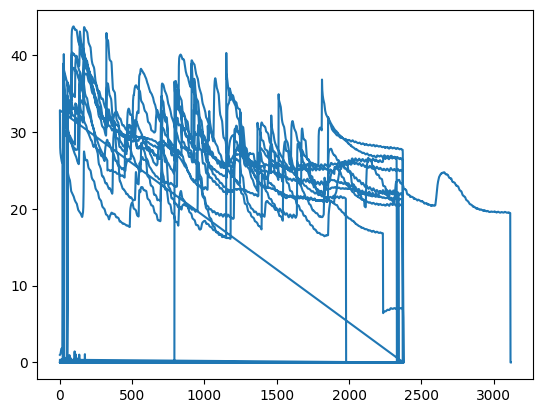

In [64]:
df["SM2"].plot()